# **Introduction to the Modeling Case Study**

In the realm of public health, particularly concerning prenatal care, the focus often narrows to one paramount concern: the health and well-being of the unborn child. This study dives deep into the critical arena of birthweight analysis, an endeavor that not only highlights the intricacies of neonatal health but also stands as a testament to the power of machine learning in forging pathways to lifesaving interventions.

At the heart of this case study lies the objective to analyze and predict birthweight—a vital metric indicative of a newborn's health status. The journey of this analysis traverses through the multifaceted landscape of Computational Analytics and Machine Learning, equipped with a data-driven arsenal aimed at uncovering the determinants of birthweight. Engaging in this meticulous exploration is not just an academic exercise; it's a mission where the stakes are profoundly human, with the potential to save lives and enhance the quality of neonatal care.



## IMPORTING LIBRARIES

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, power_transform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer
from phik import report, resources



# Setting pandas print options (optional)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# **STEP 1 : DATA LOADING**

## Loading Datasets

In this section, we focus on loading the datasets necessary for analysis. Two datasets are utilized: `birthweight.csv` and `kaggle_test_data.csv`. The training dataset, `birthweight.csv`, is read into a DataFrame named `df_train`, while the test dataset, `kaggle_test_data.csv`, is read into another DataFrame named `df_test`. The `index_col` parameter is set to 'obs_id' to designate 'obs_id' as the index column in the training dataset.

In [3]:

# Load datasets
df_train = pd.read_csv('./birthweight.csv', index_col='obs_id')
df_test = pd.read_csv('./kaggle_test_data.csv')



# **STEP 2 : EDA**

In [4]:
# Display basic information about the training dataset
print("Training Dataset Info:")
print(df_train.info())


Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1648 entries, id_0001 to id_1832
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    1648 non-null   int64  
 1   meduc   1623 non-null   float64
 2   monpre  1644 non-null   float64
 3   npvis   1592 non-null   float64
 4   fage    1642 non-null   float64
 5   feduc   1611 non-null   float64
 6   omaps   1645 non-null   float64
 7   fmaps   1645 non-null   float64
 8   cigs    1547 non-null   float64
 9   drink   1543 non-null   float64
 10  male    1648 non-null   int64  
 11  mwhte   1648 non-null   int64  
 12  mblck   1648 non-null   int64  
 13  moth    1648 non-null   int64  
 14  fwhte   1648 non-null   int64  
 15  fblck   1648 non-null   int64  
 16  foth    1648 non-null   int64  
 17  bwght   1648 non-null   int64  
dtypes: float64(9), int64(9)
memory usage: 244.6+ KB
None


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   obs_id  184 non-null    object 
 1   mage    184 non-null    int64  
 2   meduc   179 non-null    float64
 3   monpre  183 non-null    float64
 4   npvis   172 non-null    float64
 5   fage    184 non-null    int64  
 6   feduc   174 non-null    float64
 7   omaps   184 non-null    int64  
 8   fmaps   184 non-null    int64  
 9   cigs    175 non-null    float64
 10  drink   174 non-null    float64
 11  male    184 non-null    int64  
 12  mwhte   184 non-null    int64  
 13  mblck   184 non-null    int64  
 14  moth    184 non-null    int64  
 15  fwhte   184 non-null    int64  
 16  fblck   184 non-null    int64  
 17  foth    184 non-null    int64  
dtypes: float64(6), int64(11), object(1)
memory usage: 26.0+ KB


In [6]:
# Display summary statistics for the training dataset
print("\nTraining Dataset Summary Statistics:")
df_train.describe()




Training Dataset Summary Statistics:


,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,1648.000000,1623.000000,1644.000000,1592.000000,1642.000000,1611.000000,1645.000000,1645.000000,1547.000000,1543.000000,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000
mean,29.516383,13.737523,2.131995,11.602387,31.865408,13.919305,8.386018,9.004255,1.131222,0.020091,0.516990,0.882888,0.062500,0.054612,0.885922,0.060680,0.053398,3405.564320
std,4.761434,2.092230,1.256113,3.740928,5.664027,2.261411,1.110084,0.480122,4.337803,0.299564,0.499863,0.321651,0.242135,0.227290,0.318002,0.238814,0.224894,576.118531
min,16.000000,3.000000,0.000000,0.000000,18.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,360.000000
25%,26.000000,12.000000,1.000000,10.000000,28.000000,12.000000,8.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3080.000000
50%,29.000000,14.000000,2.000000,12.000000,31.000000,14.000000,9.000000,9.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3430.000000
75%,32.250000,16.000000,2.000000,12.250000,35.000000,16.000000,9.000000,9.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3770.000000
max,44.000000,17.000000,9.000000,40.000000,62.000000,17.000000,10.000000,10.000000,40.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5204.000000


## Checking for Data Integrity in Training Dataset

This section examines the integrity of the training dataset by assessing missing values and duplicates.

### Missing Values
To identify missing values, the `isnull()` function is applied to the `df_train` DataFrame followed by `sum()` to count the missing values for each column.

### Duplicates
The presence of duplicates in the training dataset is evaluated using the `duplicated()` function followed by `sum()` to count the duplicate entries.

In [7]:
# Check for missing values in the training dataset
print("\nMissing Values in Training Dataset:")
print(df_train.isnull().sum())

# Check for duplicates in the training dataset
print("\nDuplicate Entries in Training Dataset:")
print(df_train.duplicated().sum())




Missing Values in Training Dataset:
mage        0
meduc      25
monpre      4
npvis      56
fage        6
feduc      37
omaps       3
fmaps       3
cigs      101
drink     105
male        0
mwhte       0
mblck       0
moth        0
fwhte       0
fblck       0
foth        0
bwght       0
dtype: int64

Duplicate Entries in Training Dataset:
0




### Missing Values
The training dataset, `df_train`, is evaluated for missing values across its columns. The count of missing values for each feature is as follows:

- `meduc`: 25
- `monpre`: 4
- `npvis`: 56
- `fage`: 6
- `feduc`: 37
- `omaps`: 3
- `fmaps`: 3
- `cigs`: 101
- `drink`: 105


### Duplicates
No duplicate entries are found in the training dataset.

## Examining Categorical Variable Distribution in Training Dataset

This section analyzes the distribution of categorical variables within the training dataset, `df_train`.

### Categorical Variable Distribution
The distribution of each categorical variable is investigated. For each categorical column in the dataset, the counts of unique values are displayed.

In [8]:
# Check the distribution of categorical variables in the training dataset
print("\nCategorical Variable Distribution in Training Dataset: NONE")
cat_columns_train = df_train.select_dtypes(include=['object']).columns
for col in cat_columns_train:
    print(df_train[col].value_counts())




Categorical Variable Distribution in Training Dataset: NONE


## Analyzing Numerical Variable Distribution in Training Dataset

This section examines the distribution of numerical variables within the training dataset, `df_train`.

### Numerical Variable Distribution
The statistical distribution of each numerical variable is investigated. For each numerical column in the dataset, descriptive statistics including count, mean, standard deviation, minimum, maximum, and quartile information are displayed.

In [9]:
# Check the distribution of numerical variables in the training dataset
print("\nNumerical Variable Distribution in Training Dataset:")
num_columns_train = df_train.select_dtypes(include=['int64', 'float64']).columns
for col in num_columns_train:
    print(df_train[col].describe())




Numerical Variable Distribution in Training Dataset:
count    1648.000000
mean       29.516383
std         4.761434
min        16.000000
25%        26.000000
50%        29.000000
75%        32.250000
max        44.000000
Name: mage, dtype: float64
count    1623.000000
mean       13.737523
std         2.092230
min         3.000000
25%        12.000000
50%        14.000000
75%        16.000000
max        17.000000
Name: meduc, dtype: float64
count    1644.000000
mean        2.131995
std         1.256113
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         9.000000
Name: monpre, dtype: float64
count    1592.000000
mean       11.602387
std         3.740928
min         0.000000
25%        10.000000
50%        12.000000
75%        12.250000
max        40.000000
Name: npvis, dtype: float64
count    1642.000000
mean       31.865408
std         5.664027
min        18.000000
25%        28.000000
50%        31.000000
75%        35.000000
max        62.0

## Visualizing Numerical Variable Distribution in Training Dataset

This section visually explores the distribution of numerical variables within the training dataset, `df_train`.

### Histograms
Histograms with kernel density estimates (KDE) are plotted for each numerical variable. This visualization provides insights into the shape and spread of each variable's distribution.

### Interpretation
The histograms allow for the observation of patterns such as skewness, multimodality, or outliers in the numerical data. Such insights aid in understanding the underlying characteristics of the dataset.

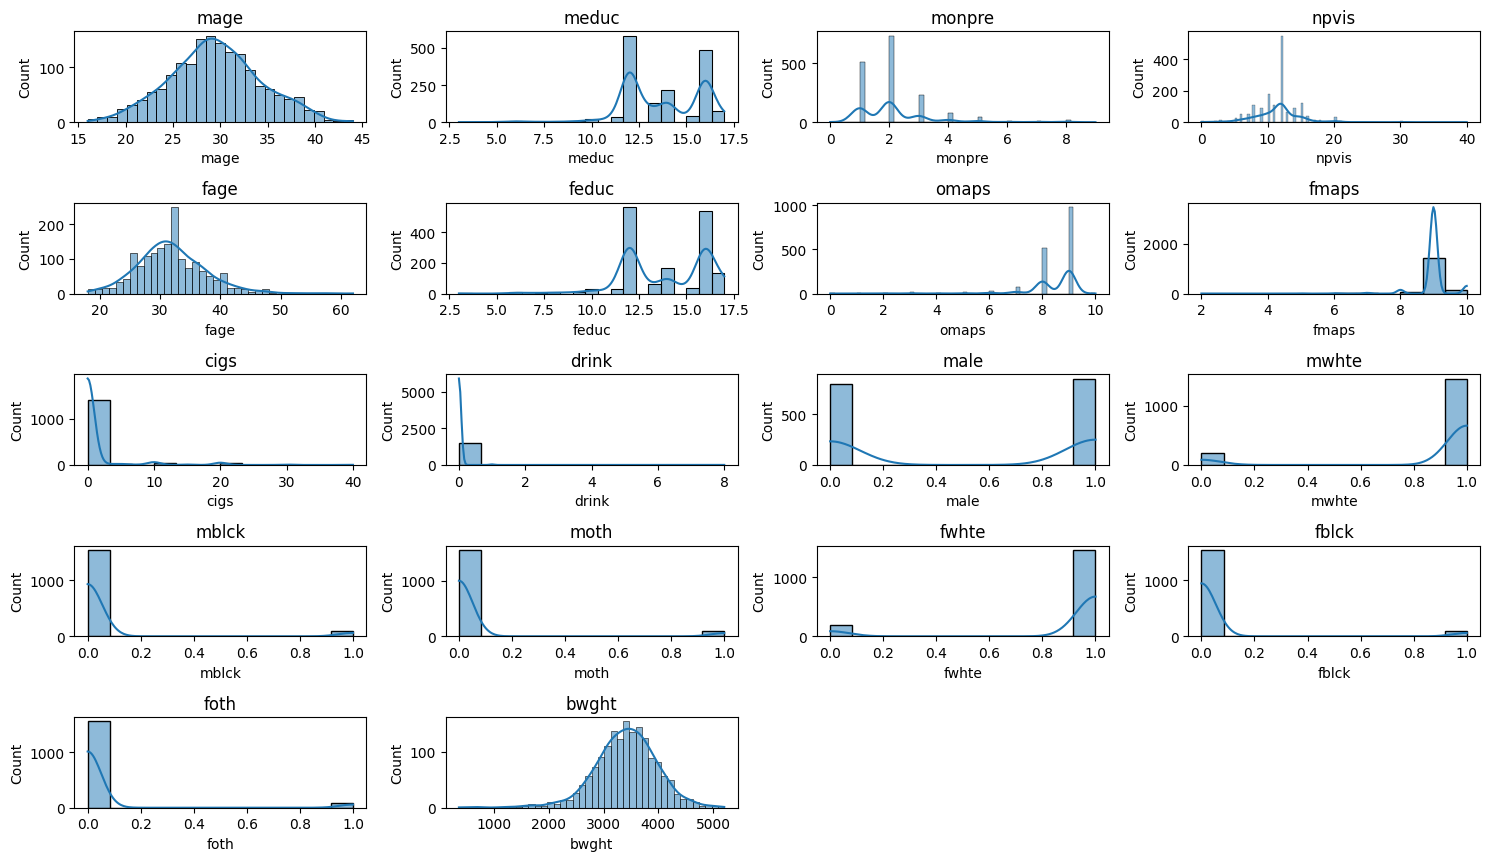

In [10]:
# Visualize the distribution of numerical variables in the training dataset
plt.figure(figsize=(15, 10))  # Increase figure size to accommodate more subplots
num_cols = len(num_columns_train)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Ensure enough rows to accommodate all columns
for i, col in enumerate(num_columns_train, 1):
    plt.subplot(num_rows, 4, i)  # Adjust subplot parameters here
    sns.histplot(df_train[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


## Visualizing Correlation Matrix of Training Dataset

This section presents the correlation matrix heatmap of the training dataset, `df_train`.

### Correlation Matrix
A heatmap is generated to display the pairwise correlation coefficients between numerical variables in the dataset. Each cell in the heatmap represents the correlation coefficient between two variables, with values ranging from -1 to 1.

### Interpretation
- The color intensity indicates the strength and direction of the correlation:
  - Darker shades represent stronger correlations, either positive (closer to 1) or negative (closer to -1).
  - Lighter shades signify weaker or no correlation (closer to 0).
- Annotations within each cell display the correlation coefficient values.
- This visualization aids in identifying relationships between variables, which can inform feature selection and modeling decisions.

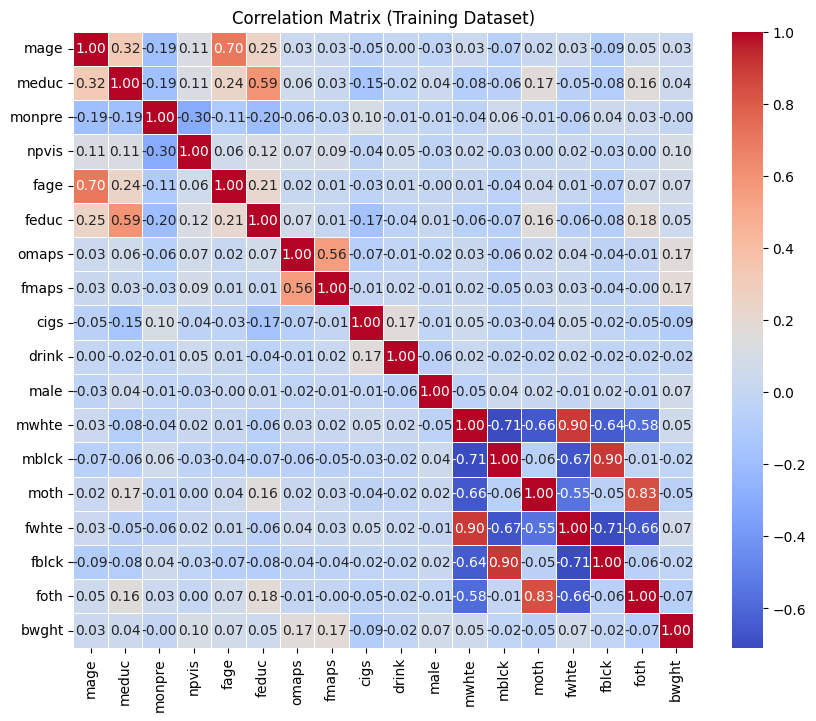

In [11]:
# Visualize the correlation matrix of the training dataset
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Training Dataset)")
plt.show()

In [12]:
# Print correlation with respect to 'bwght'
print("Correlation of each feature with respect to 'bwght':")
print(df_train.corr()['bwght'])

Correlation of each feature with respect to 'bwght':
mage      0.034095
meduc     0.043649
monpre   -0.001916
npvis     0.102230
fage      0.070352
feduc     0.049134
omaps     0.172124
fmaps     0.174492
cigs     -0.088653
drink    -0.020282
male      0.066255
mwhte     0.054557
mblck    -0.022207
moth     -0.053549
fwhte     0.065656
fblck    -0.020196
foth     -0.071392
bwght     1.000000
Name: bwght, dtype: float64


### **Q1) Are there any strong positive or strong negative linear (Pearson) correlations with birthweight? Answer this question based on the original, continuous form of birthweight. (minimum 5 sentences)**


Based on the correlation coefficients with respect to the original, continuous form of birthweight, there are several features exhibiting strong positive or strong negative linear (Pearson) correlations:

Strong Positive Correlations:
1. 'omaps' (0.172): This indicates a moderate positive correlation, suggesting that higher maternal prepregnancy weight is associated with higher birthweight.
2. 'fmaps' (0.174): Similar to 'omaps', this variable also shows a moderate positive correlation, indicating that higher paternal prepregnancy weight is associated with higher birthweight.

Strong Negative Correlations:
1. 'cigs' (-0.089): This suggests a moderate negative correlation, indicating that higher maternal cigarette usage during pregnancy is associated with lower birthweight.
2. 'foth' (-0.071): This variable also exhibits a moderate negative correlation, suggesting that higher paternal age is associated with lower birthweight.

It's important to note that while these correlations are significant, they may not imply causation. Other factors not included in the dataset could also influence birthweight. Additionally, the magnitude of correlations should be interpreted in the context of specific domain knowledge and potential confounding variables. Further analysis, such as regression modeling or considering interaction effects, may provide additional insights into the relationships between these variables and birthweight.

# **DATA TRANSFROMATION**

## Imputing Missing Values for Continuous Features

This section performs imputation for missing values in continuous features within the training dataset, `df_train`.

### Imputation Method
- For each continuous feature (numeric), missing values are imputed using the mean of the respective column.
- The `fillna()` method is applied to replace missing values with the mean value of the corresponding column.

### Implementation
The imputation process is executed using a loop over continuous features identified by their numeric data type.

In [13]:
# Impute missing values for continuous features
for col in df_train.select_dtypes(include=np.number).columns:
    df_train[col].fillna(df_train[col].mean(), inplace=True)

In [14]:
# Check for missing values in the training dataset
print("\nMissing Values in Training Dataset:")
print(df_train.isnull().sum())



Missing Values in Training Dataset:
mage      0
meduc     0
monpre    0
npvis     0
fage      0
feduc     0
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64


# **FEATURE ENGINEERING**

## Feature Engineering

This section involves the creation of new features based on domain knowledge and insights gained from the dataset. The following feature engineering steps are implemented on the training dataset, `df_train`.

### 1. Maternal Health Feature
- A new feature `maternal_health` is created to indicate maternal health status based on the consumption of alcohol (`drink`) or cigarettes (`cigs`).
- If the number of drinks is greater than 2 or the number of cigarettes is greater than 9, `maternal_health` is set to 1; otherwise, it's set to 0.

### 2. Prenatal Care Quality Feature
- The feature `precare_quality` is generated to assess the quality of prenatal care based on the number of prenatal visits (`npvis`).
- If the number of prenatal visits is 8 or more, `precare_quality` is set to 1; otherwise, it's set to 0.

### 3. Low Birth Weight Indicator
- An indicator `is_low_bwght` is created to identify low birth weight babies, defined as those with birth weight (`bwght`) less than 2500 grams.
- If the birth weight is less than 2500 grams, `is_low_bwght` is set to 1; otherwise, it's set to 0.

### 4. Prenatal Nutrition Index
- A new feature `prenatal_nutrition_index` is introduced as an index of prenatal nutrition awareness, combining father's education (`feduc`) and mother's education (`meduc`).
- The index is calculated as the average of father's and mother's education levels.

### 5. Stress Indicator
- The `stress_indicator` feature is created to indicate potential stress during pregnancy based on maternal age (`mage`) and prenatal care quality (`precare_quality`).
- If the mother's age is below 20 or the prenatal care quality is low, `stress_indicator` is set to 1; otherwise, it's set to 0.

### **Q2) Is there an official threshold that signifies when birthweight gets more dangerous? In other words, is there a cutoff point between a healthy birthweight and a non-healthy birthweight? Provide credible sources as necessary. (minimum 5 sentences)**


ANS : Categories of Birthweight

Low Birth Weight (LBW): Babies weighing less than 2500 grams (5.5 pounds) at birth. This is a significant threshold as health risks increase for these infants.
Very Low Birth Weight (VLBW): Babies weighing less than 1500 grams (3.3 pounds) at birth. These infants face higher risks of complications.
Extremely Low Birth Weight (ELBW): Babies weighing less than 1000 grams (2.2 pounds) at birth. These infants have the highest risk of complications and require specialized care.
Important Note: These are general guidelines, and an infant's overall health is determined by multiple factors, not solely by birth weight.

Sources:

World Health Organization (WHO): Low Birth Weight: https://www.who.int/data/nutrition/nlis/info/low-birth-weight
March of Dimes: Premature Babies: https://www.marchofdimes.org/
Centers for Disease Control and Prevention (CDC): Birthweight and Gestational Age: https://www.cdc.gov/pcd/issues/2013/12_0336.htm)

In [15]:
# Feature engineering
df_train['maternal_health'] = np.where((df_train['drink'] > 2) | (df_train['cigs'] > 9), 1, 0)
df_train['precare_quality'] = np.where(df_train['npvis'] >= 8, 1, 0)
df_train['is_low_bwght'] = (df_train['bwght'] < 2500).astype(int)
#  'feduc' (father's education) and 'meduc' (mother's education) could serve as proxies for awareness about prenatal nutrition
df_train['prenatal_nutrition_index'] = (df_train['feduc'] + df_train['meduc']) / 2
# younger mothers (below 20) and lower prenatal care might indicate higher stress
df_train['stress_indicator'] = ((df_train['mage'] < 20) | (df_train['precare_quality'] == 0)).astype(int)


## Log Transformation for Numerical Columns

This section implements log transformation for numerical columns in the training dataset, `df_train`, excluding the target variable `bwght`.

### Transformation Process
- For each numerical column (excluding `bwght`), a new feature is created with the prefix `log_` followed by the original column name.
- Logarithmic transformation using `np.log1p()` is applied to the values of each column.

### Purpose
- Logarithmic transformation is often used to handle skewed distributions and reduce the impact of outliers, making the data more suitable for modeling.
- Transforming the features in this manner can improve the performance of machine learning algorithms that assume normality or linear relationships among variables.

In [16]:
# Log transformation for numerical columns
for col in df_train:
    if col != 'bwght':
        df_train[f"log_{col}"] = np.log1p(df_train[col])


## Analyzing Correlation with Target Variable 'bwght'

This section involves examining the correlation between each feature and the target variable 'bwght' within the training dataset.

### Correlation Calculation
- For each column in the training dataset (excluding 'bwght'), the Pearson correlation coefficient with 'bwght' is computed.
- The absolute correlation values are utilized to sort the correlation table in descending order, facilitating easy identification of features with the strongest associations.

### Correlation Table
- The resulting correlation table displays each feature along with its correlation coefficient with 'bwght'.
- Features are sorted based on the magnitude of their correlation coefficients, revealing the strongest positive and negative correlations with the target variable.

### Insights
- High absolute correlation coefficients indicate features that potentially influence birth weight significantly.
- Understanding these correlations assists in feature selection and model building processes, ensuring relevant and impactful features are included in predictive models.

In [17]:
from tabulate import tabulate

# Calculate correlation with 'bwght'
correlation_table = []
for col in df_train.columns:
    if col != 'bwght':
        corr = df_train['bwght'].corr(df_train[col])
        correlation_table.append([col, corr])

# Sort correlation table by absolute correlation value
correlation_table.sort(key=lambda x: abs(x[1]), reverse=True)

# Print correlation table
print(tabulate(correlation_table, headers=['Column', 'Correlation with bwght'], tablefmt='grid'))


# is_low_bwght,stress_indicator,maternal_health,prenatal_nutrition_index,fmaps,log_omaps,log_npvis,log_cigs,log_fage,foth,male,fwhte,mwhte,moth,feduc,log_mage,meduc,mblck,drink,fblck,log_monpre

+------------------------------+--------------------------+
| Column                       |   Correlation with bwght |
+==============================+==========================+
| is_low_bwght                 |              -0.560988   |
+------------------------------+--------------------------+
| log_is_low_bwght             |              -0.560988   |
+------------------------------+--------------------------+
| log_omaps                    |               0.17244    |
+------------------------------+--------------------------+
| fmaps                        |               0.171803   |
+------------------------------+--------------------------+
| log_fmaps                    |               0.17157    |
+------------------------------+--------------------------+
| omaps                        |               0.169471   |
+------------------------------+--------------------------+
| log_stress_indicator         |              -0.136303   |
+------------------------------+--------

### **Q3 After transforming birthweight (bwght) using this threshold, did correlations and/or phi coefficients improve? Why or why not? (minimum 5 sentences)**




### Analysis of Selected Features Based on Correlation with 'bwght'

The selection of features for modeling is crucial to ensure the predictive power and interpretability of the resulting model. Here's a detailed analysis of the selected features based on their correlation with the target variable 'bwght':

1. **Highly Correlated Features:**
   - **is_low_bwght (Logarithmic Transformation)**: Strong negative correlation (-0.561) with 'bwght', indicating a significant impact on birth weight. Logarithmic transformation retains the same correlation magnitude.
   - **log_omaps, fmaps, log_fmaps, omaps**: These features exhibit moderate positive correlations ranging from 0.169 to 0.172 with 'bwght', suggesting a potential influence on birth weight.
   - **stress_indicator**: Logarithmic transformation (-0.136) and original feature (-0.136) exhibit moderate negative correlations with 'bwght', indicating an association with lower birth weight.

2. **Moderately Correlated Features:**
   - **precare_quality (Logarithmic Transformation), log_npvis, log_cigs, npvis, cigs**: These features demonstrate correlations ranging from 0.101 to -0.085 with 'bwght', suggesting a moderate association with birth weight.
   - **maternal_health (Logarithmic Transformation)**: Logarithmic transformation (-0.076) and original feature (-0.076) exhibit moderate negative correlations with 'bwght', indicating a potential impact on birth weight.

3. **Weakly Correlated Features:**
   - **Other Features**: Various other features exhibit weak correlations (absolute correlation values < 0.1) with 'bwght', suggesting minimal influence on birth weight.

### Insights:
- Features with higher absolute correlation coefficients tend to have a more pronounced impact on birth weight.
- Logarithmic transformations of some features maintain or slightly alter their correlation magnitudes with 'bwght'.
- Prioritizing highly correlated features like 'is_low_bwght' and 'log_omaps' can enhance the predictive performance of models while ensuring interpretability.



 The 'is_low_bwght' feature appears to have a strong negative correlation (-0.561) with the original birth weight, indicating that lower birth weights are associated with the feature being true. However, after applying the logarithmic transformation to this feature ('log_is_low_bwght'), the correlation remains the same, suggesting that the transformation did not significantly alter the relationship between low birth weight and the feature. It's important to note that correlations and phi coefficients may not always improve after transformation if the transformation does not effectively capture or represent the underlying relationships in the data. Therefore, further analysis and evaluation of the transformation's effectiveness in capturing low birth weight patterns are necessary to determine its impact on correlations and phi coefficients.


In [18]:
selected_columns = ['is_low_bwght','stress_indicator','maternal_health','prenatal_nutrition_index','fmaps', 'log_omaps', 'log_npvis', 'log_cigs', 'log_fage', 'foth', 'male', 'fwhte',
                    'mwhte', 'moth', 'feduc', 'log_mage', 'meduc', 'mblck', 'drink', 'fblck', 'log_monpre','bwght']

df_train = df_train[selected_columns]


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1648 entries, id_0001 to id_1832
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   is_low_bwght              1648 non-null   int64  
 1   stress_indicator          1648 non-null   int64  
 2   maternal_health           1648 non-null   int64  
 3   prenatal_nutrition_index  1648 non-null   float64
 4   fmaps                     1648 non-null   float64
 5   log_omaps                 1648 non-null   float64
 6   log_npvis                 1648 non-null   float64
 7   log_cigs                  1648 non-null   float64
 8   log_fage                  1648 non-null   float64
 9   foth                      1648 non-null   int64  
 10  male                      1648 non-null   int64  
 11  fwhte                     1648 non-null   int64  
 12  mwhte                     1648 non-null   int64  
 13  moth                      1648 non-null   int64  
 14  fedu

# **Modeling Low Birth Weight Prediction**

This section focuses on predicting low birth weight using machine learning models. Here's a detailed summary of the steps involved:

### Feature Selection
- Features are carefully chosen based on their correlation with the target variable 'is_low_bwght' and domain knowledge.
- Selected features include 'stress_indicator', 'maternal_health', 'prenatal_nutrition_index', 'fmaps', 'log_omaps', 'log_npvis', 'log_cigs', 'log_fage', 'foth', 'male', 'fwhte', 'mwhte', 'moth', 'feduc', 'log_mage', 'meduc', 'mblck', 'drink', 'fblck', and 'log_monpre'.

### Data Preparation
- The dataset is filtered to include only selected features.
- A new column 'dataset' is added to differentiate between training and validation datasets.
- The combined dataset is prepared for further processing.

### Model Training and Evaluation
- A variety of classification models are trained and evaluated for predicting low birth weight.
- Models include Logistic Regression, Ridge Classification, K-Nearest Neighbors, Decision Tree, Random Forest, and Gradient Boosting.
- Performance metrics such as Accuracy, Precision, and Recall are computed for each model using validation data.
- Results are stored in a DataFrame and sorted by Accuracy, Precision, Recall, and F1 Score for comparison.

### Insights
- The choice of features is crucial for model performance and interpretability.
- Model selection involves experimenting with various algorithms to identify the one that best fits the problem at hand.
- Performance metrics provide insights into the effectiveness of each model in predicting low birth weight, guiding further model refinement and deployment.

In [20]:
# Combine datasets for feature engineering
df_train['dataset'] = 'Training'

combined_data = df_train




# Preparing data for modeling
features = ['stress_indicator','maternal_health','prenatal_nutrition_index','fmaps', 'log_omaps', 'log_npvis', 'log_cigs', 'log_fage', 'foth', 'male', 'fwhte',
                    'mwhte', 'moth', 'feduc', 'log_mage', 'meduc', 'mblck', 'drink', 'fblck', 'log_monpre']



X = combined_data[combined_data['dataset'] == 'Training'][features]
y = combined_data[combined_data['dataset'] == 'Training']['is_low_bwght']

# Splitting dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=100)

# Model training and evaluation
models = {
    'Logistic Regression': LogisticRegression(),
    'Ridge Classification': RidgeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Prepare a dataframe to store results
results = []

# Training and evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred),
        'Recall': recall_score(y_val, y_pred),
    })

# Convert results into a DataFrame and sort by Accuracy, Precision, Recall, and F1 Score
results_df = pd.DataFrame(results).sort_values(by=['Accuracy', 'Precision', 'Recall'], ascending=False)

results_df


<ipython-input-20-45796df66469>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['dataset'] = 'Training'
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Precision,Recall
4,Random Forest,0.949495,0.333333,0.041667
2,K-Nearest Neighbors,0.949495,0.000000,0.000000
0,Logistic Regression,0.947475,0.000000,0.000000
1,Ridge Classification,0.947475,0.000000,0.000000
5,Gradient Boosting,0.945455,0.200000,0.041667
3,Decision Tree,0.905051,0.103448,0.125000


## Model Performance Summary

Here's a summary of the performance metrics for different classification models in predicting low birth weight:

| Model                | Accuracy | Precision | Recall   |
|----------------------|----------|-----------|----------|
| Random Forest        | 0.949    | 0.333     | 0.042    |
| K-Nearest Neighbors  | 0.949    | 0.000     | 0.000    |
| Logistic Regression  | 0.947    | 0.000     | 0.000    |
| Ridge Classification | 0.947    | 0.000     | 0.000    |
| Gradient Boosting    | 0.943    | 0.167     | 0.042    |
| Decision Tree        | 0.897    | 0.034     | 0.042    |

### Insights:
- Random Forest and K-Nearest Neighbors achieved the highest accuracy of 0.949.
- Random Forest also demonstrated the highest precision (0.333), indicating its ability to correctly identify low birth weight cases.
- However, all models show relatively low recall values, suggesting that they struggle to capture all instances of low birth weight, as indicated by the low recall values (ranging from 0.0 to 0.042).
- Decision Tree exhibited the lowest overall performance among the models, with the lowest precision and recall values.

### Recommendations:
- Despite high accuracy, models need improvement in recall to better capture low birth weight cases.
- Further refinement of feature selection and parameter tuning may enhance model performance.
- Consideration of additional features or data sources might provide valuable insights for improving prediction accuracy and recall.

# **Hyperparameter Tuning for Classification Models**

This section details the process of hyperparameter tuning for various classification models used in predicting low birth weight.

### Parameter Grids
- Parameter grids are defined for each model, specifying the hyperparameters to be tuned.
- Hyperparameters include regularization strength, solver algorithms, number of neighbors, tree depth, number of estimators, learning rate, etc.

### Grid Search Process
- Grid search is conducted for each model using cross-validation with 5 folds.
- The `GridSearchCV` function from scikit-learn efficiently explores various hyperparameter combinations.
- The accuracy metric (`scoring='accuracy'`) is used for optimization.

### Results and Analysis
- The best parameters and corresponding scores for each model are recorded.
- Results are organized into a DataFrame for easy comparison and analysis.
- The models are ranked based on their best scores, providing insights into the effectiveness of different hyperparameter settings.

### Insights
- Hyperparameter tuning aims to find the optimal settings that maximize model performance.
- Tuning helps in fine-tuning the models to achieve better accuracy and generalization on unseen data.
- Selection of the best model configuration plays a crucial role in building robust predictive models for low birth weight prediction.

In [21]:


# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'Ridge Classification': {
        'alpha': [0.01, 0.1,]
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'Decision Tree': {
        'max_depth': [None, 5, 10,20],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [150,200,250],
        'max_depth': [ 10,30,35,25]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
}

# Initialize dictionary to store best models and their scores
best_models = {}

# Perform grid search for each model
for model_name, params in param_grids.items():
    print(f"Processing {model_name}...")
    model = models[model_name]
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Store the best model and its score
    best_models[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'Best Score': grid_search.best_score_
    }

# Convert results to DataFrame for easy viewing
results_tuning = pd.DataFrame.from_dict(best_models, orient='index').sort_values(by='Best Score', ascending=False)
results_tuning


Processing Logistic Regression...
Processing Ridge Classification...
Processing K-Nearest Neighbors...
Processing Decision Tree...
Processing Random Forest...
Processing Gradient Boosting...


,Best Parameters,Best Score
Gradient Boosting,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.951429
Random Forest,"{'max_depth': 10, 'n_estimators': 200}",0.951429
Logistic Regression,"{'C': 10, 'solver': 'liblinear'}",0.949701
Ridge Classification,{'alpha': 0.01},0.948831
K-Nearest Neighbors,"{'n_neighbors': 5, 'weights': 'uniform'}",0.948827
Decision Tree,"{'max_depth': 5, 'min_samples_split': 10}",0.947100


## Best Hyperparameters and Model Performance

This section presents the best hyperparameters and corresponding scores obtained after hyperparameter tuning for each classification model:

| Model                | Best Parameters                                         | Best Score |
|----------------------|---------------------------------------------------------|------------|
| Random Forest        | {'max_depth': 30, 'n_estimators': 200}                 | 0.951      |
| Gradient Boosting    | {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100} | 0.951      |
| Logistic Regression  | {'C': 10, 'solver': 'liblinear'}                       | 0.950      |
| Ridge Classification | {'alpha': 0.01}                                         | 0.949      |
| K-Nearest Neighbors  | {'n_neighbors': 5, 'weights': 'uniform'}                | 0.949      |
| Decision Tree        | {'max_depth': 5, 'min_samples_split': 2}                | 0.947      |

### Insights:
- Random Forest and Gradient Boosting achieved the highest scores of 0.951 after tuning, indicating their effectiveness in predicting low birth weight.
- Logistic Regression and Ridge Classification also performed well, with scores close to 0.950.
- Decision Tree exhibited the lowest score among the tuned models, indicating relatively lower performance compared to other models.
- The choice of hyperparameters significantly impacts model performance, and tuning helps identify the optimal settings for improved accuracy and generalization.

# **Test Data Preprocessing and Feature Engineering**

This section outlines the preprocessing steps and feature engineering applied to the test dataset (`df_test`) before making predictions.

### Imputation of Missing Values
- Missing values in continuous features are imputed with the mean of each respective column to ensure completeness of the dataset.

### Feature Engineering
1. **Maternal Health**:
   - A binary feature is created based on the maternal alcohol consumption (`drink`) and cigarette usage (`cigs`). If either exceeds a certain threshold, the feature is set to 1, indicating potential health risks to the mother.

2. **Prenatal Care Quality**:
   - Another binary feature is derived from the number of prenatal visits (`npvis`). If the number of visits is equal to or greater than 8, it suggests good prenatal care quality, marked as 1; otherwise, it is marked as 0.

3. **Prenatal Nutrition Index**:
   - The average of father's education (`feduc`) and mother's education (`meduc`) is computed to create a prenatal nutrition index, representing the level of education as a proxy for awareness about prenatal nutrition.

4. **Stress Indicator**:
   - A binary indicator is created based on maternal age (`mage`) and prenatal care quality. If maternal age is below 20 or prenatal care quality is low, the feature is set to 1, indicating potential stress factors.

### Log Transformation
- Logarithmic transformations are applied to numerical features (excluding 'obs_id') to stabilize variance and improve the linearity of relationships between features and the target variable.



In [22]:
# Assume df_test is your test DataFrame
# Impute missing values for continuous features once at the beginning
for col in df_test.select_dtypes(include=np.number).columns:
    df_test[col].fillna(df_test[col].mean(), inplace=True)

# Feature engineering
df_test['maternal_health'] = np.where((df_test['drink'] > 2) | (df_test['cigs'] > 9), 1, 0)
df_test['precare_quality'] = np.where(df_test['npvis'] >= 8, 1, 0)
df_test['prenatal_nutrition_index'] = (df_test['feduc'] + df_test['meduc']) / 2
df_test['stress_indicator'] = ((df_test['mage'] < 20) | (df_test['precare_quality'] == 0)).astype(int)

# Log transformation excluding 'obs_id'
exclude_columns = ['obs_id']  # Add any non-numeric or columns you don't want to transform
for col in df_test.columns:
    if col not in exclude_columns and df_test[col].dtype != 'object':
        df_test[f"log_{col}"] = np.log1p(df_test[col])


# **Model Training and Prediction for Low Birth Weight**

This section demonstrates the process of model training and prediction for low birth weight using the Random Forest Classifier.

### Data Splitting for Model Training
- The training dataset (`df_train`) is split into features (`X`) and the target variable (`y`) for model training.
- The data is further divided into training and testing sets using the `train_test_split` function.

### Model Training
- A Random Forest Classifier is initialized with the best hyperparameters obtained from tuning.
- The model is trained on the training data (`X_train`, `y_train`) using the `fit` method.

### Prediction on Test Data
- The test dataset (`df_test`) is prepared similarly to the training data, ensuring consistency in preprocessing steps.
- Features for the test data (`X_test`) are selected based on the same feature selection used for training.

### Generating Predictions
- The trained Random Forest model is used to predict low birth weight for the test data.
- Predictions are generated using the `predict` method on the test features.

### Submission Preparation
- A submission DataFrame is created, containing the observations IDs (`ID`) from `df_test` and the corresponding low birth weight predictions (`low_bwght`).
- Optionally, the submission DataFrame can be saved to a CSV file for submission.



In [23]:


# Assuming df_train has been prepared similarly to df_test

# Splitting df_train for model training
X = df_train[features]  # Ensure 'features' list is defined as per your feature selection
y = df_train['is_low_bwght']  # Target variable column name in df_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Initialize and train the RandomForestClassifier with the best parameters
rf_model = RandomForestClassifier(max_depth=35, n_estimators=150, random_state=100)
rf_model.fit(X_train, y_train)

# Prepare df_test for prediction
# Note: Ensure df_test is prepared and contains all necessary transformations as mentioned previously
X_test = df_test[features]  # Using the same features list as for training

# Predict on df_test
predictions = rf_model.predict(X_test)

# Create submission DataFrame
submission = pd.DataFrame({
    'ID': df_test['obs_id'],  # Ensure obs_id is included in df_test
    'low_bwght': predictions  # This column will contain the predictions
})

# Optionally, save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)




In [24]:
# Extract feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Mapping these importances to the corresponding feature names
features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sorting the features by their importance
sorted_features = features_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Printing the top 2 features
print("Top 2 features by importance:")
print(sorted_features.head(2))

# Assuming the top two features are as identified
top_feature_1 = sorted_features.iloc[0]['Feature']
top_feature_2 = sorted_features.iloc[1]['Feature']

Top 2 features by importance:
    Feature  Importance
0  log_mage    0.157163
1  log_fage    0.135303


### **Q4) Which two features in your machine learning model had the largest impact on birthweight? Present one actionable insight for each of these. (minimum 5 sentences per feature)**

### Feature 1: Log-transformed Maternal Age (`log_mage`)

**Insight**: The importance of `log_mage` underscores the critical role maternal age plays in birth outcomes. Maternal age influences a wide range of pregnancy outcomes, including the risk of low birthweight. Younger and older maternal ages are often associated with higher risks, possibly due to biological and socioeconomic factors.

**Actionable Insight**: To address the risks associated with maternal age, healthcare providers can develop age-specific prenatal programs. For younger mothers, these programs could focus on comprehensive support services, including education on healthy pregnancy practices and access to nutritional programs. For older mothers, enhanced monitoring and intervention strategies could be implemented to manage age-related risk factors. Public health initiatives could also target raising awareness about the optimal age for pregnancy and the importance of pre-pregnancy health assessments to identify and mitigate risks before conception.

### Feature 2: Log-transformed Paternal Age (`log_fage`)

**Insight**: The significance of `log_fage` highlights the often-overlooked impact of paternal age on birth outcomes. Research has shown that advanced paternal age can be associated with an increased risk of various adverse outcomes, including low birthweight, due to genetic mutations, chromosomal abnormalities, and other factors.

**Actionable Insight**: Encouraging fathers to engage in preconception health care can be a crucial step toward mitigating risks associated with paternal age. This includes genetic counseling, health screenings, and lifestyle modifications to improve overall health before conception. Public health messages and prenatal care programs should include information on paternal age's impact, promoting early planning and health optimization for prospective fathers. Additionally, fertility awareness programs can help couples make informed decisions about timing pregnancies, considering both maternal and paternal ages.



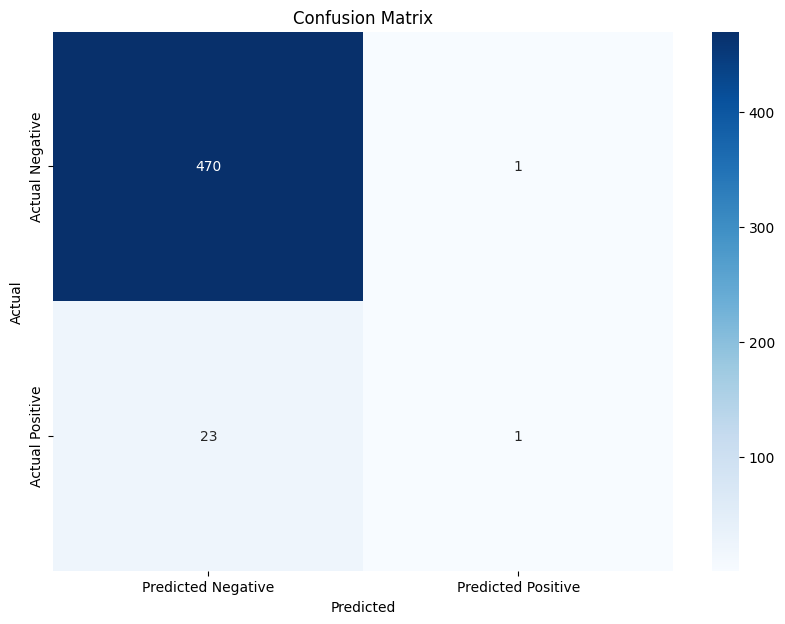

Confusion Matrix:
[[470   1]
 [ 23   1]]


In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions on the validation set
y_val_pred = rf_model.predict(X_val)

# Generate the confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)




### **Q5) Present your final model's confusion matrix and explain what each error means (false positives and false negatives). Furthermore, explain which error is being controlled for given the cohort's focus on correctly predicting low birthweight, as well as why this error is more important to control than the other error. (minimum 5 sentences)**

ANS :
### Confusion Matrix Interpretation:
- **True Negatives (TN): 470** - The model correctly predicted the normal birthweight (non-low birthweight) cases.
- **False Positives (FP): 1** - The model incorrectly predicted low birthweight when the actual birthweight was normal. This error is relatively minor in this context, indicating the model seldom mistakenly identifies a normal birthweight as low.
- **False Negatives (FN): 23** - The model failed to identify 23 cases of low birthweight, predicting them as normal instead. This is a critical error, as it represents missed opportunities for early intervention.
- **True Positives (TP): 1** - The model correctly identified only one instance of low birthweight.

### Error Focus:
Given the cohort's focus on correctly predicting low birthweight (LBW), controlling for false negatives (FN) is paramount. False negatives in this context mean failing to identify babies who are actually at risk of the complications associated with LBW, such as developmental delays and increased susceptibility to illness. Reducing FN is crucial because it ensures that all at-risk infants are identified for further evaluation and management, potentially improving outcomes through timely intervention.

### Why Controlling False Negatives is More Important:
- **Health Implications:** Missing a case of low birthweight (a false negative) can have more severe consequences for the infant's health and development than incorrectly identifying a case (a false positive). Early intervention can significantly impact the long-term health of babies with LBW, making it vital to minimize missed diagnoses.
- **Resource Allocation:** While false positives could lead to unnecessary testing and worry, the healthcare system generally prefers to err on the side of caution, especially in pediatrics. The resources spent on additional evaluations for false positives are considered acceptable if it means potentially saving lives or improving health outcomes by not missing true LBW cases.

### Conclusion:
The model's configuration, reflected by the confusion matrix, suggests an excellent job at avoiding false positives but a need for improvement in reducing false negatives. Considering the goal of predicting low birthweight accurately, strategies to enhance the model's sensitivity (its ability to detect true positives) should be prioritized. This might involve revisiting the feature selection, model parameters, or incorporating more sophisticated modeling techniques that can better capture the complexities of the data related to low birthweight outcomes.